## 1. Jupyter Notebook with colab


In [0]:
import pandas_datareader as pdr

In [17]:
df = pdr.DataReader("DEXKOUS", "fred", "1995-01-01", "2019-12-30")
df.head()

,DEXKOUS
DATE,
1995-01-02,NaN
1995-01-03,791.8
1995-01-04,791.6
1995-01-05,792.4
1995-01-06,792.7


In [5]:
df.tail()

,DEXKOUS
DATE,
2019-06-10,1185.01
2019-06-11,1178.88
2019-06-12,1182.82
2019-06-13,1183.23
2019-06-14,1184.70


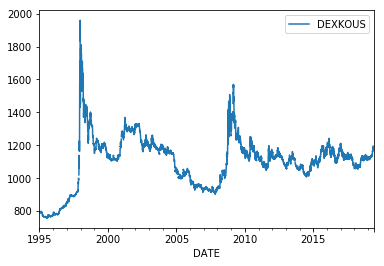

In [6]:
df.plot()

In [0]:
df.to_excel("exchange rate.xlsx")

In [9]:
!ls -al

total 112
drwxr-xr-x 1 root root  4096 Jun 23 10:59  .
drwxr-xr-x 1 root root  4096 Jun 23 10:56  ..
drwxr-xr-x 1 root root  4096 Jun 18 16:14  .config
-rw-r--r-- 1 root root 97108 Jun 23 11:00 'exchange rate.xlsx'
drwxr-xr-x 1 root root  4096 Jun 18 16:14  sample_data


In [0]:
from google.colab import files

files.download("exchange rate.xlsx") # code sniffet use

## 2. Jupyter Notebook Markdown

# Title
## Title
### Title

category
* category1
* category2
* category3

numbering
1. category
2. category
3. category

<img width = 100%
     src="https://www.virtualvirginia.org/wp-content/uploads/2019/03/summer-19-site-banner.png">

## 3. Google Search Counter

In [11]:
!pip install finance-datareader

In [0]:
import FinanceDataReader as fdr

In [20]:
df = fdr.DataReader("KS11", "2015-01-01", "2019-06-23")
df.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2015-01-02,1926.44,1914.24,1929.15,1909.67,258780000.0,0.0057
2015-01-05,1915.75,1921.96,1921.96,1903.37,313440000.0,-0.0055
2015-01-06,1882.45,1895.48,1900.02,1877.38,303690000.0,-0.0174
2015-01-07,1883.83,1878.90,1887.60,1876.27,280510000.0,0.0007
2015-01-08,1904.65,1895.85,1907.23,1891.77,262210000.0,0.0111


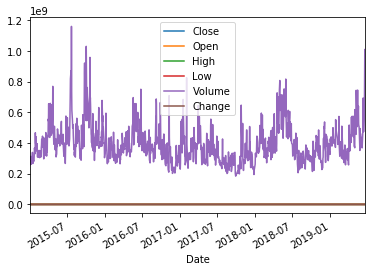

In [15]:
df.plot() # too many plot

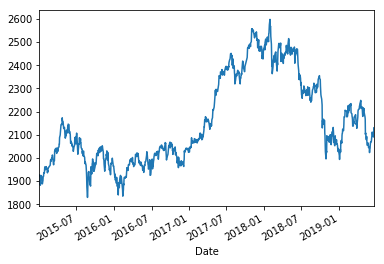

In [21]:
df["Close"].plot()

In [0]:
import requests

from bs4 import BeautifulSoup

In [24]:
url = "https://www.google.com/search?q=finance"
header={"user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36"}

r = requests.get(url, headers=header)
soup = BeautifulSoup(r.text)
div = soup.find("div", attrs={"id":"resultStats"})

div

<div id="resultStats">About 7,100,000,000 results<nobr> (0.56 seconds) </nobr></div>

### Pre processing

In [25]:
div.text

'About 7,100,000,000 results (0.56 seconds)\xa0'

In [31]:
div.text.split(" ")

['About', '7,100,000,000', 'results', '(0.56', 'seconds)\xa0']

In [32]:
div.text.split(" ")[1]

'7,100,000,000'

In [33]:
div.text.split(" ")[1].replace(",", "")

'7100000000'

In [34]:
float(div.text.split(" ")[1].replace(",", ""))

7100000000.0

### Make Function

In [0]:
import requests
from bs4 import BeautifulSoup

def get_google_counter(keyword) :
  
  url = "https://www.google.com/search?q=" + keyword
  header={"user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36"}
  
  r = requests.get(url, headers=header)
  soup = BeautifulSoup(r.text)
  div = soup.find("div", attrs={"id":"resultStats"})
  
  return float(div.text.split(" ")[1].replace(",", "")) 

In [38]:
get_google_counter("samsung")

2460000000.0

In [39]:
get_google_counter("lg")

1730000000.0

## 4. Naver Stock

In [0]:
def naver_factor(code):
  url = "https://finance.naver.com/item/main.nhn?code=" + code
  r = requests.get(url)
  soup = BeautifulSoup(r.text)

  per = float(soup.find("em", id = "_per").text)
  pbr = float(soup.find("em", id = "_pbr").text)
  
  return per, pbr

In [45]:
naver_factor("005930") ## 005930 = samsung

(7.59, 1.29)

In [47]:
per, pbr = naver_factor("005930")
pbr

1.29